In [35]:
import pathlib
import pendulum
import math
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
def calculate_investment_dollars(account_balance, target_balance, percentage_change, aggression):
    difference = account_balance - target_balance
    percent_over = difference / target_balance
    multiplier = difference * math.exp(percent_over) * aggression
    dollars = multiplier * abs(percentage_change ** 2)
    return dollars

# from matplotlib import pyplot as plt
target = 5000
numbers = []
for account_balance in range(6000, 11000, 1000):
    for percent_change in range(2, 10, 2):
        percent_change = percent_change / 100
        for aggression in range(1, 11):
            aggression = aggression / 10
            d = {}
            d['account_balance'] = account_balance
            d['percent_change'] = percent_change
            d['aggression'] = aggression
            dollars = calculate_investment_dollars(account_balance, target, percent_change, aggression)
            d['dollars'] = dollars
            numbers.append(d)


In [48]:
df = pd.DataFrame(numbers)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


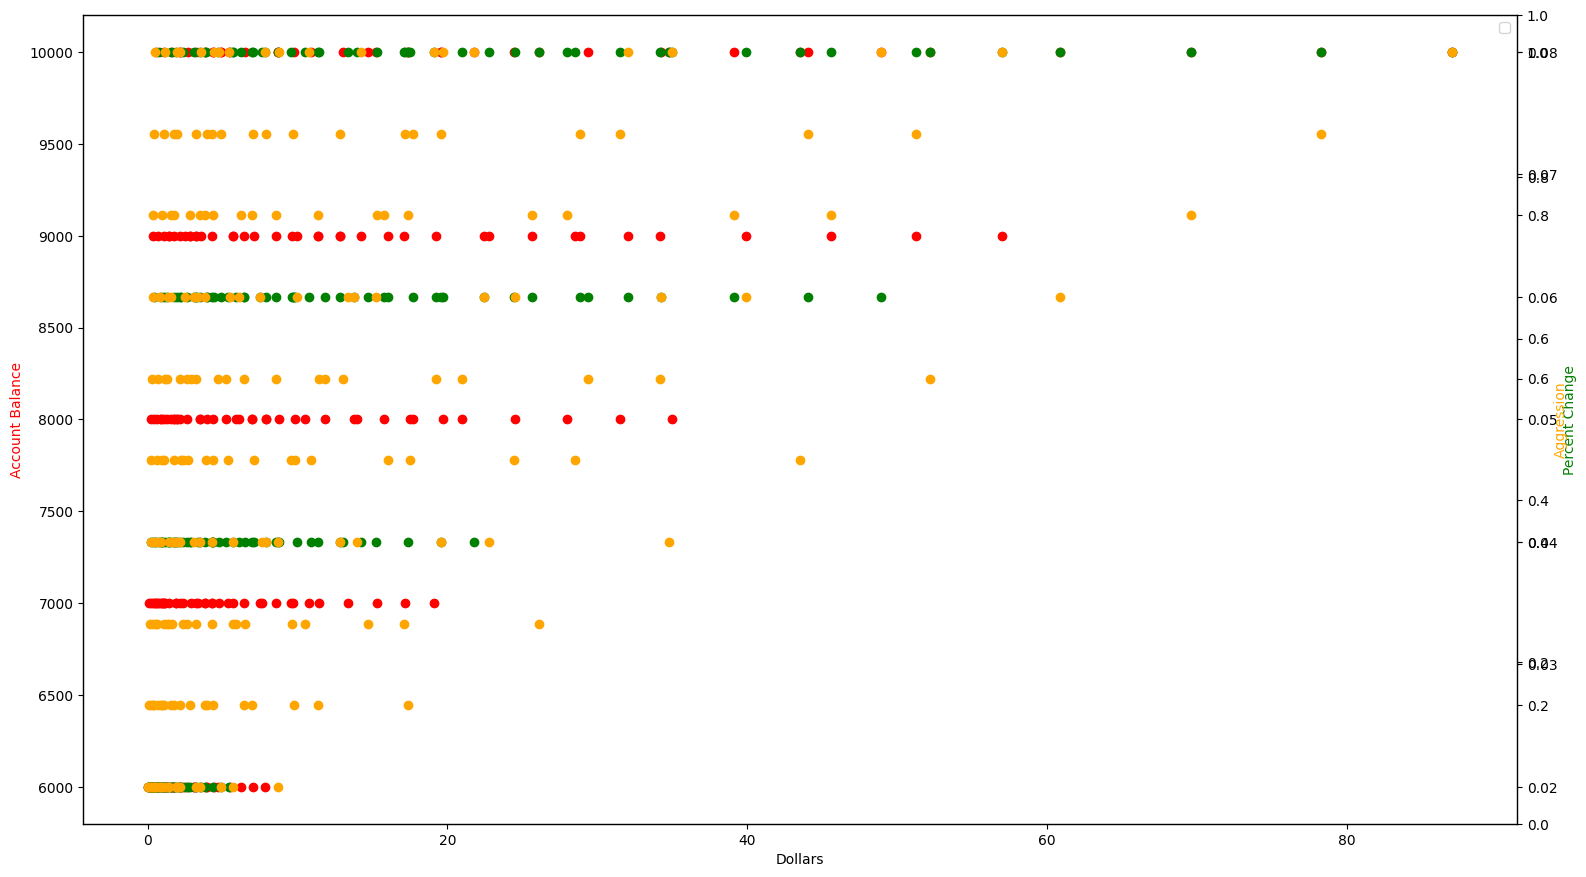

In [55]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

ax1.scatter(df['dollars'], df['account_balance'], color='red')
ax3.scatter(df['dollars'], df['percent_change'], color='green')
ax4.scatter(df['dollars'], df['aggression'], color='orange')

ax1.set_xlabel('Dollars')
ax1.set_ylabel('Account Balance', color='red')
ax3.set_ylabel('Percent Change', color='green')
ax4.set_ylabel('Aggression', color='orange')

plt.legend()
plt.show()

<Axes: xlabel='dollars', ylabel='aggression'>

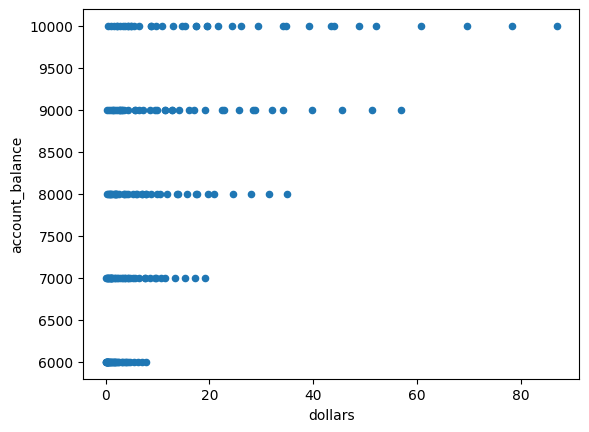

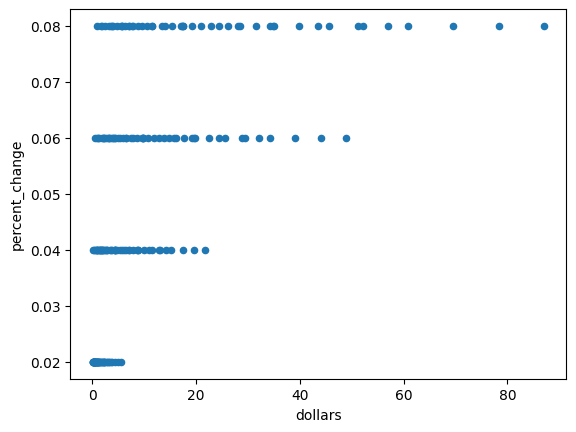

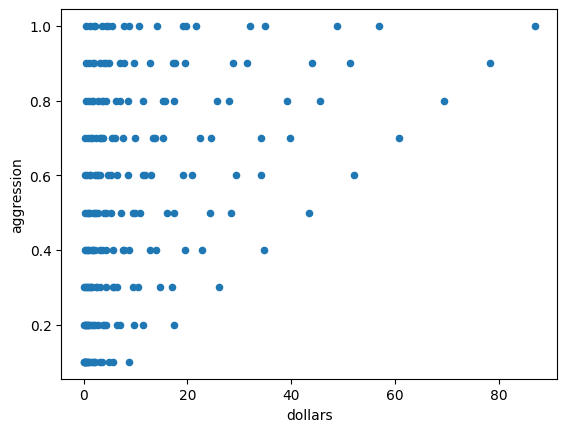

In [59]:
df.plot.scatter(x='dollars', y='account_balance')
df.plot.scatter(x='dollars', y='percent_change')
df.plot.scatter(x='dollars', y='aggression')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

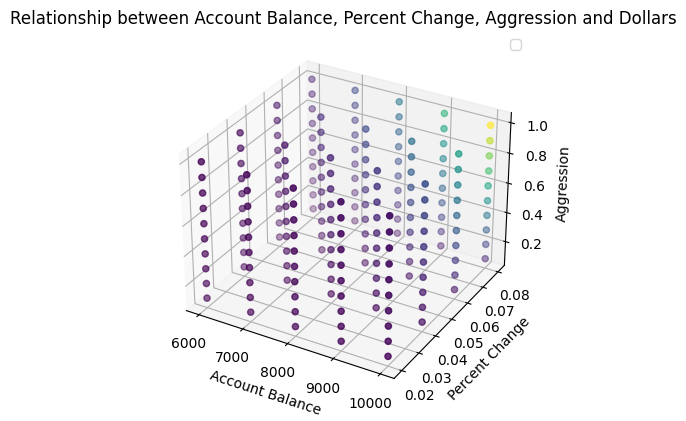

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['account_balance']
y = df['percent_change']
z = df['aggression']
output = df['dollars']

ax.scatter(x, y, z, c=output, cmap='viridis')

ax.set_xlabel('Account Balance')
ax.set_ylabel('Percent Change')
ax.set_zlabel('Aggression')
ax.set_title('Relationship between Account Balance, Percent Change, Aggression and Dollars')

plt.show()